# Basic models
## Loading data

In [243]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [244]:
%run proj1_helpers.py
%run implementations.py

In [245]:
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tx = copy.deepcopy(tX)

## Cleaning data

In [246]:
tx = np.where(tx==-999, np.nan, tx) # replace -999 value with nan

In [247]:
col_mean = np.nanmean(tx, axis=0)
inds_nan = np.where(np.isnan(tx))
tx[inds_nan] = np.take(col_mean, inds_nan[1])

In [200]:
#CELL NOT USED
tx_stand,_,_ = standardize(tx)

In [201]:
#CELL NOT USED
tx = np.insert(tx, 0, 1, axis=1)
tx_stand = np.insert(tx_stand, 0, 1, axis=1)

## Split data

In [255]:
#CELL NOT USED
ratio_train_test = 0.8
x_train, y_train, x_test, y_test = split_data(tx_stand, y, ratio_train_test, seed=1)
x_train_ns, y_train_ns, x_test_ns, y_test_ns = split_data(tx, y, ratio_train_test, seed=1)

In [272]:
ratio_train_test = 0.8
x_train, y_train, x_test, y_test = split_data(tx, y, ratio_train_test, seed=1234)
x_train_ns, y_train_ns, x_test_ns, y_test_ns = split_data(tx, y, ratio_train_test, seed=1234)

In [273]:
x_train,_,_ = standardize(copy.deepcopy(x_train))
x_train = np.insert(x_train, 0, 1, axis=1)
x_test,_,_ = standardize(copy.deepcopy(x_test))
x_test = np.insert(x_test, 0, 1, axis=1)
x_train_ns = np.insert(x_train_ns, 0, 1, axis=1)
x_test_ns = np.insert(x_test_ns, 0, 1, axis=1)

## Linear Regression with Gradient Descent

In [266]:
weights_LSGD1 = least_squares_GD(y_train, x_train, np.zeros(31), 100, 0.000001)[1]
cat_accuracy_train, f1_score_train = metrics(y_train, predict_labels(weights_LSGD1, x_train))
cat_accuracy_test, f1_score_test = metrics(y_test, predict_labels(weights_LSGD1, x_test))


print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
print("Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)

Categorical accuracy train :  0.7010101548075558  || f1_score train:  0.30623682103672634
Categorical accuracy test :  0.7017579390797148  || f1_score test:  0.30701182924738557


In [205]:
weights_LSGD1

array([-3.13555942e-05,  1.03258226e-06, -3.33830175e-05, -1.34723653e-06,
        1.83515123e-05,  1.75818016e-05,  1.69936926e-05, -1.57962055e-05,
        1.15171684e-06, -1.28776195e-06,  1.45452610e-05, -1.85412502e-05,
        2.58789644e-05,  1.63563627e-05,  2.22844893e-05, -8.68497416e-08,
       -4.21125419e-07, -3.07848564e-06,  1.15137937e-07,  2.87341544e-07,
        2.17343257e-06,  6.84685489e-07,  1.28828828e-05,  1.27088824e-05,
        8.28798568e-06, -3.57808512e-08, -2.03768035e-09, -1.23385840e-06,
        4.28436345e-08, -3.19839962e-07,  1.27679650e-05])

In [274]:
gammas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.31, 0.32, 0.33, 0.34, 0.4, 0.5]
weights_result = []
accuracies_train = []
accuracies_test = []
for gamma in gammas:
    weights_LSGD1 = least_squares_GD(y_train, x_train, np.zeros(31), 100, gamma)[1]
    cat_accuracy_train, f1_score_train = metrics(y_train, predict_labels(weights_LSGD1, x_train))
    cat_accuracy_test, f1_score_test = metrics(y_test, predict_labels(weights_LSGD1, x_test))
    
    print("Gamma: " + str(gamma) + " || Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
    print("Gamma: " + str(gamma) + " || Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)
    weights_result.append(weights_LSGD1)
    accuracies_train.append(cat_accuracy_train)
    accuracies_test.append(cat_accuracy_test)
    
print(accuracies_train)
print(accuracies_test)

Gamma: 1e-06 || Categorical accuracy train :  0.7010101548075558  || f1_score train:  0.30623682103672634
Gamma: 1e-06 || Categorical accuracy test :  0.7017579390797148  || f1_score test:  0.30701182924738557
Gamma: 1e-05 || Categorical accuracy train :  0.701019031387587  || f1_score train:  0.30622408822501285
Gamma: 1e-05 || Categorical accuracy test :  0.7017984445884641  || f1_score test:  0.30701182924738557
Gamma: 0.0001 || Categorical accuracy train :  0.701596009089618  || f1_score train:  0.30645324954995246
Gamma: 0.0001 || Categorical accuracy test :  0.7023250162022034  || f1_score test:  0.30718595721338454
Gamma: 0.001 || Categorical accuracy train :  0.705501704303366  || f1_score train:  0.3075727017678276
Gamma: 0.001 || Categorical accuracy test :  0.7063755670771225  || f1_score test:  0.30788211103495544
Gamma: 0.01 || Categorical accuracy train :  0.725092316432325  || f1_score train:  0.2932460685392237
Gamma: 0.01 || Categorical accuracy test :  0.7241574854180

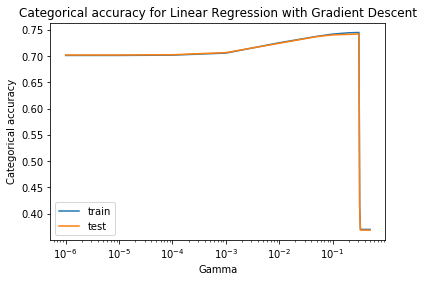

In [275]:
plt.plot(gammas[:], accuracies_train[:], label="train")
plt.plot(gammas[:], accuracies_test[:], label="test")
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Categorical accuracy")
plt.title("Categorical accuracy for Linear Regression with Gradient Descent")
plt.legend()
plt.show()

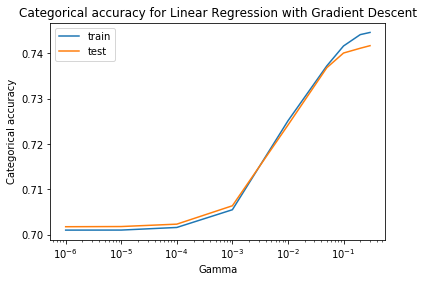

In [276]:
plt.plot(gammas[:9], accuracies_train[:9], label="train")
plt.plot(gammas[:9], accuracies_test[:9], label="test")
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Categorical accuracy")
plt.title("Categorical accuracy for Linear Regression with Gradient Descent")
plt.legend()
plt.show()

### Least Squares GD with non-standardized data

In [277]:
gammas = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.31, 0.32, 0.33, 0.34, 0.4, 0.5]
weights_result_2 = []
accuracies_train_2 = []
accuracies_test_2 = []
for gamma in gammas:
    weights_LSGD1 = least_squares_GD(y_train_ns, x_train_ns, np.zeros(31), 100, gamma)[1]
    cat_accuracy_train, f1_score_train = metrics(y_train_ns, predict_labels(weights_LSGD1, x_train_ns))
    cat_accuracy_test, f1_score_test = metrics(y_test_ns, predict_labels(weights_LSGD1, x_test_ns))
    
    print("Gamma: " + str(gamma) + " || Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
    print("Gamma: " + str(gamma) + " || Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)
    weights_result_2.append(weights_LSGD1)
    accuracies_train_2.append(cat_accuracy_train)
    accuracies_test_2.append(cat_accuracy_test)
    
print(accuracies_train_2)
print(accuracies_test_2)

Gamma: 1e-07 || Categorical accuracy train :  0.6573595725039056  || f1_score train:  0.0
Gamma: 1e-07 || Categorical accuracy test :  0.6570803629293583  || f1_score test:  0.0
Gamma: 1e-06 || Categorical accuracy train :  0.6654416986223548  || f1_score train:  0.021400752582887303
Gamma: 1e-06 || Categorical accuracy test :  0.665951069345431  || f1_score test:  0.022270287591123927
Gamma: 1e-05 || Categorical accuracy train :  0.3426404274960943  || f1_score train:  0.5103979002555262
Gamma: 1e-05 || Categorical accuracy test :  0.3429196370706416  || f1_score test:  0.5107076069252579
Gamma: 0.0001 || Categorical accuracy train :  0.3426404274960943  || f1_score train:  0.5103979002555262
Gamma: 0.0001 || Categorical accuracy test :  0.3429196370706416  || f1_score test:  0.5107076069252579
Gamma: 0.001 || Categorical accuracy train :  0.3426404274960943  || f1_score train:  0.5103979002555262
Gamma: 0.001 || Categorical accuracy test :  0.3429196370706416  || f1_score test:  0.51

C:\Users\ruben\git\ML\implementations.py:212: RuntimeWarning: invalid value encountered in subtract
  ws = ws - gamma*grad


Gamma: 0.2 || Categorical accuracy train :  0.6573595725039056  || f1_score train:  0.0
Gamma: 0.2 || Categorical accuracy test :  0.6570803629293583  || f1_score test:  0.0
Gamma: 0.3 || Categorical accuracy train :  0.6573595725039056  || f1_score train:  0.0
Gamma: 0.3 || Categorical accuracy test :  0.6570803629293583  || f1_score test:  0.0
Gamma: 0.31 || Categorical accuracy train :  0.6573595725039056  || f1_score train:  0.0
Gamma: 0.31 || Categorical accuracy test :  0.6570803629293583  || f1_score test:  0.0
Gamma: 0.32 || Categorical accuracy train :  0.6573595725039056  || f1_score train:  0.0
Gamma: 0.32 || Categorical accuracy test :  0.6570803629293583  || f1_score test:  0.0
Gamma: 0.33 || Categorical accuracy train :  0.6573595725039056  || f1_score train:  0.0
Gamma: 0.33 || Categorical accuracy test :  0.6570803629293583  || f1_score test:  0.0
Gamma: 0.34 || Categorical accuracy train :  0.6573595725039056  || f1_score train:  0.0
Gamma: 0.34 || Categorical accuracy

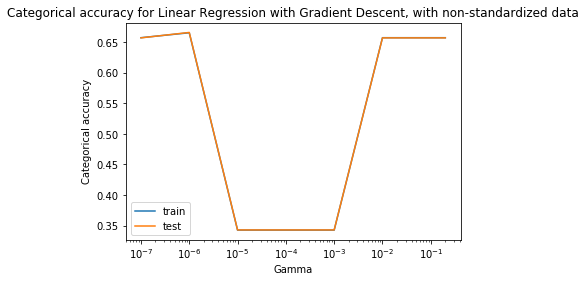

In [278]:
plt.plot(gammas[:9], accuracies_train_2[:9], label="train")
plt.plot(gammas[:9], accuracies_test_2[:9], label="test")
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Categorical accuracy")
plt.title("Categorical accuracy for Linear Regression with Gradient Descent, with non-standardized data")
plt.legend()
plt.show()

## Linear Regression with Stochastic Gradient Descent

In [279]:
gammas = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.31, 0.32, 0.33, 0.34, 0.4, 0.5]
weights_result_3 = []
accuracies_train_3 = []
accuracies_test_3 = []
for gamma in gammas:
    weights_LSGD1 = least_squares_SGD(y_train, x_train, np.zeros(31), 100, gamma)[1]
    cat_accuracy_train, f1_score_train = metrics(y_train, predict_labels(weights_LSGD1, x_train))
    cat_accuracy_test, f1_score_test = metrics(y_test, predict_labels(weights_LSGD1, x_test))
    
    print("Gamma: " + str(gamma) + " || Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
    print("Gamma: " + str(gamma) + " || Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)
    weights_result_3.append(weights_LSGD1)
    accuracies_train_3.append(cat_accuracy_train)
    accuracies_test_3.append(cat_accuracy_test)
    
print(accuracies_train_3)
print(accuracies_test_3)

Gamma: 1e-07 || Categorical accuracy train :  0.6571864791932964  || f1_score train:  0.30203097328460005
Gamma: 1e-07 || Categorical accuracy test :  0.6591866493843163  || f1_score test:  0.3043373742230159
Gamma: 1e-06 || Categorical accuracy train :  0.6779221701462861  || f1_score train:  0.26937345899486137
Gamma: 1e-06 || Categorical accuracy test :  0.6823152948801037  || f1_score test:  0.2725396214533114
Gamma: 1e-05 || Categorical accuracy train :  0.6899810041187331  || f1_score train:  0.338866463920376
Gamma: 1e-05 || Categorical accuracy test :  0.6925631885936487  || f1_score test:  0.3400235333669524
Gamma: 0.0001 || Categorical accuracy train :  0.677087771623349  || f1_score train:  0.32546524763660145
Gamma: 0.0001 || Categorical accuracy test :  0.6795609202851588  || f1_score test:  0.3260670576668814
Gamma: 0.001 || Categorical accuracy train :  0.6532763456895327  || f1_score train:  0.31078923101144823
Gamma: 0.001 || Categorical accuracy test :  0.651166558651

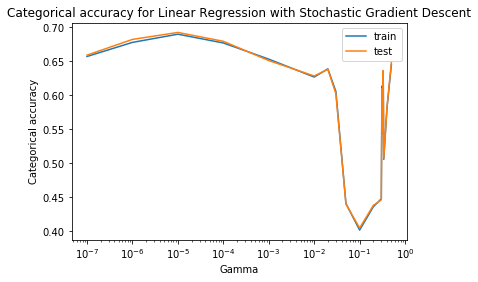

In [280]:
plt.plot(gammas[:], accuracies_train_3[:], label="train")
plt.plot(gammas[:], accuracies_test_3[:], label="test")
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Categorical accuracy")
plt.title("Categorical accuracy for Linear Regression with Stochastic Gradient Descent")
plt.legend()
plt.show()

## Least Squares

In [285]:
weights_LS = least_squares(y_train, x_train)[1]
cat_accuracy_train, f1_score_train = metrics(y_train, predict_labels(weights_LS, x_train))
cat_accuracy_test, f1_score_test = metrics(y_test, predict_labels(weights_LS, x_test))


print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
print("Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)

Categorical accuracy train :  0.7449270345121431  || f1_score train:  0.2906434212622619
Categorical accuracy test :  0.697950421257291  || f1_score test:  0.30410441353254336


## Ridge regression

In [286]:
lambdas = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
lambdas =  np.logspace(-6, 12, 40)
weights_result_4 = []
accuracies_train_4 = []
accuracies_test_4 = []
for lambda_ in lambdas:
    weights_RR = ridge_regression(y_train, x_train, lambda_)[1]
    cat_accuracy_train, f1_score_train = metrics(y_train, predict_labels(weights_RR, x_train))
    cat_accuracy_test, f1_score_test = metrics(y_test, predict_labels(weights_RR, x_test))
    
    print("Lambda: " + str(lambda_) + " || Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
    print("Lambda: " + str(lambda_) + " || Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)
    weights_result_4.append(weights_RR)
    accuracies_train_4.append(cat_accuracy_train)
    accuracies_test_4.append(cat_accuracy_test)
    
print(accuracies_train_4)
print(accuracies_test_4)

Lambda: 1e-06 || Categorical accuracy train :  0.7449270345121431  || f1_score train:  0.2906434212622619
Lambda: 1e-06 || Categorical accuracy test :  0.6981934543097861  || f1_score test:  0.3042791400508277
Lambda: 2.894266124716752e-06 || Categorical accuracy train :  0.7449314728021588  || f1_score train:  0.29064990535727153
Lambda: 2.894266124716752e-06 || Categorical accuracy test :  0.6985580038885288  || f1_score test:  0.30439560439560437
Lambda: 8.376776400682924e-06 || Categorical accuracy train :  0.7449314728021588  || f1_score train:  0.29064990535727153
Lambda: 8.376776400682924e-06 || Categorical accuracy test :  0.6996921581335062  || f1_score test:  0.30474490146261074
Lambda: 2.424462017082331e-05 || Categorical accuracy train :  0.7449181579321119  || f1_score train:  0.29063693711805966
Lambda: 2.424462017082331e-05 || Categorical accuracy test :  0.7023250162022034  || f1_score test:  0.30491949603487933
Lambda: 7.017038286703837e-05 || Categorical accuracy trai

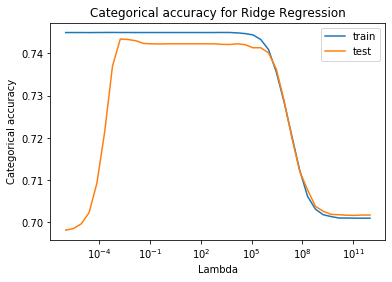

In [287]:
plt.plot(lambdas[:], accuracies_train_4[:], label="train")
plt.plot(lambdas[:], accuracies_test_4[:], label="test")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Categorical accuracy")
plt.title("Categorical accuracy for Ridge Regression")
plt.legend()
plt.show()

In [288]:
print("Best performance: lambda ", lambdas[np.argmax(accuracies_test_4)], ", train accuracy: ", accuracies_train_4[np.argmax(accuracies_test_4)], ", test accuracy: ", accuracies_test_4[np.argmax(accuracies_test_4)])

Best performance: lambda  0.0017012542798525892 , train accuracy:  0.74494034938219 , test accuracy:  0.7433976020738821


## Logistic regression

In [220]:
y_train_log = np.copy(y_train)
y_train_log = np.where(y_train_log==-1, 0, y_train_log)

y_test_log = np.copy(y_test)
y_test_log = np.where(y_test_log==-1, 0, y_test_log)

gammas = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.31, 0.32, 0.33, 0.34, 0.4, 0.5]
weights_result_5 = []
accuracies_train_5 = []
accuracies_test_5 = []
for gamma in gammas:
    weights_LR = logistic_regression(y_train_log, x_train, np.zeros(31), 10000, gamma)[1]
    cat_accuracy_train, f1_score_train = metrics(y_train_log, predict_labels(weights_LR, x_train))
    cat_accuracy_test, f1_score_test = metrics(y_test_log, predict_labels(weights_LR, x_test))
    
    print("Gamma: " + str(gamma) + " || Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
    print("Gamma: " + str(gamma) + " || Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)
    weights_result_5.append(weights_LR)
    accuracies_train_5.append(cat_accuracy_train)
    accuracies_test_5.append(cat_accuracy_test)
    
print(accuracies_train_5)
print(accuracies_test_5)

The loss for step 0 is 155989.9942229971.
The loss for step 1000 is 155986.6570715598.
The loss for step 2000 is 155982.98179237847.
The loss for step 3000 is 155980.06425238322.
The loss for step 4000 is 155976.5968732667.
The loss for step 5000 is 155973.095968284.
The loss for step 6000 is 155969.6429974646.
The loss for step 7000 is 155966.12319732865.
The loss for step 8000 is 155962.90345196048.
The loss for step 9000 is 155959.52730909263.
Gamma: 1e-07 || Categorical accuracy train :  0.7000702078686135  || f1_score train:  0.3066197633514551
Gamma: 1e-07 || Categorical accuracy test :  0.7009297106676284  || f1_score test:  0.3029107725788901
The loss for step 0 is 155989.96826378352.
The loss for step 1000 is 155956.79188752055.
The loss for step 2000 is 155923.7250396881.
The loss for step 3000 is 155889.3155319965.
The loss for step 4000 is 155858.36890505935.
The loss for step 5000 is 155824.44251516537.
The loss for step 6000 is 155791.68708996166.
The loss for step 7000 i

In [221]:
print("Best performance: gamma ", gammas[np.argmax(accuracies_test_5)], ", train accuracy: ", accuracies_train_5[np.argmax(accuracies_test_5)], ", test accuracy: ", accuracies_test_5[np.argmax(accuracies_test_5)])

Best performance: gamma  0.01 , train accuracy:  0.7480070741092932 , test accuracy:  0.7530656407790334


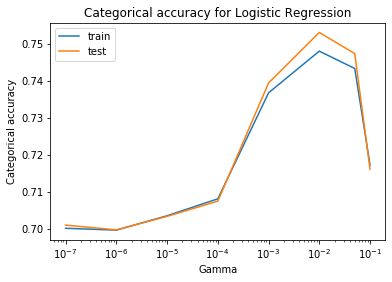

In [222]:
plt.plot(gammas[:8], accuracies_train_5[:8], label="train")
plt.plot(gammas[:8], accuracies_test_5[:8], label="test")
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Categorical accuracy")
plt.title("Categorical accuracy for Logistic Regression")
plt.legend()
plt.show()

## Regularized logistic regression

In [193]:
gammas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
lambdas = lambdas =  np.logspace(-4, 4, 5)
weights_result_6 = []
accuracies_train_6 = []
accuracies_test_6 = []
for lambda_ in lambdas:
    accuracy_train = []
    accuracy_test = []
    weights = []
    for gamma in gammas:
        weights_RLR = reg_logistic_regression(y_train_log, x_train, lambda_, np.zeros(31), 10000, gamma)[1]
        cat_accuracy_train, f1_score_train = metrics(y_train_log, predict_labels(weights_RLR, x_train))
        cat_accuracy_test, f1_score_test = metrics(y_test_log, predict_labels(weights_RLR, x_test))

        print("Lambda: " + str(lambda_) + " Gamma: " + str(gamma) + " || Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)
        print("Lambda: " + str(lambda_) + " Gamma: " + str(gamma) + " || Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)
        weights.append(weights_RLR)
        accuracy_train.append(cat_accuracy_train)
        accuracy_test.append(cat_accuracy_test)
    weights_result_6.append(weights)
    accuracies_train_6.append(accuracy_train)
    accuracies_test_6.append(accuracy_test)

print(accuracies_train_6)
print(accuracies_test_6)

IndexError: list index out of range

In [191]:
best_index = np.unravel_index(np.argmax(np.matrix(accuracies_test_6), axis=None), np.matrix(accuracies_test_6).shape)
print(np.argmax(accuracies_test_6))
print("Best performance: lambda ", lambdas[best_index[0]], ", gamma: ", gammas[best_index[1]], ", train accuracy: ", accuracies_train_6[best_index], ", test accuracy: ", accuracies_test_6[best_index])

0


TypeError: list indices must be integers or slices, not tuple

In [194]:
weights_result_6

[]

# Advanced models

## Categorical splitting

In [241]:
len(tX[np.where(tX[:,22]==3)])

22164